In [262]:
# https://strftime.org/

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [264]:
date_data_one = ['Saturday January 27, 2017', 'Saturday December 2, 2017']
date_data_two = ['2017-01-01', '2016-05-03']
date_data_three = ['08/17/1978', '01/07/1976']
date_data_four = ['2016 March 01 01:56', '2016 January 4 02:16']

In [265]:
date_data_one = pd.to_datetime(date_data_one, format="%A %B %d, %Y")
print(date_data_one)
date_data_two = pd.to_datetime(date_data_two, format="%Y-%m-%d")
print(date_data_two)
date_data_three = pd.to_datetime(date_data_three, format="%m/%d/%Y")
print(date_data_three)
date_data_four = pd.to_datetime(date_data_four, format="%Y %B %d %H:%M")
print(date_data_four)

DatetimeIndex(['2017-01-27', '2017-12-02'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2017-01-01', '2016-05-03'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1978-08-17', '1976-01-07'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2016-03-01 01:56:00', '2016-01-04 02:16:00'], dtype='datetime64[ns]', freq=None)


In [266]:
date_str = "2018-03-09"
from datetime import datetime
date_obj = datetime.strptime(date_str, '%Y-%m-%d')

weekday = date_obj.weekday()  # Returns an integer between 0 (Monday) and 6 (Sunday)

print(weekday)

4


In [267]:
user_purchases = pd.read_csv('./user_purchase2.csv',parse_dates=True,index_col=0)
# user_purchases.dropna(subset=['month1'],inplace=True)
user_purchases.head()

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_54700\2522027535.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_purchases = pd.read_csv('./user_purchase2.csv',parse_dates=True,index_col=0)


,Unnamed: 0,date,uid,sku,price,reg_date,device,gender,country,age,first_week_purchases
0,0,2018-03-14,84715271.0,sku_two_299,299,2018-03-09,and,M,USA,34,1
1,1,2018-03-16,84715271.0,sku_two_299,299,2018-03-09,and,M,USA,34,1
2,7,2018-01-14,47315877.0,sku_three_499,499,2018-01-07,iOS,F,BRA,15,1
3,8,2018-01-15,47315877.0,sku_one_199,199,2018-01-07,iOS,F,BRA,15,0
4,9,2018-01-16,47315877.0,sku_two_299,299,2018-01-07,iOS,F,BRA,15,0


In [268]:
# # create a new column 'first_week_purchases'
# user_purchases['first_week_purchases'] = user_purchases['reg_date'] >= (pd.to_datetime(user_purchases['date']) - pd.Timedelta(days=7))
# user_purchases['first_week_purchases'] = user_purchases['first_week_purchases'].astype(int)
# (user_purchases.head())
purchase = user_purchases.copy()

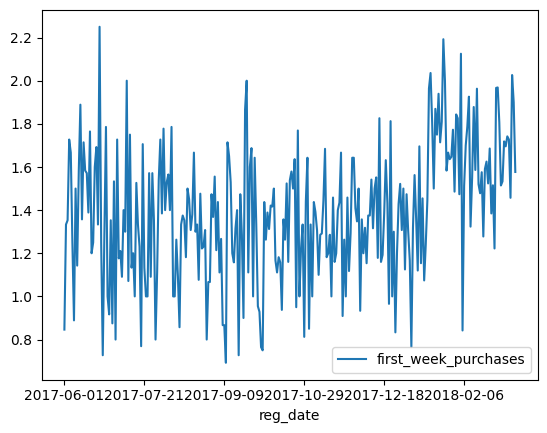

In [269]:
# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Plot the results 
# Filter user purchases for users who registered between 2017-06-01 and 2018-03-10
user_purchases = user_purchases[
    user_purchases["reg_date"].between("2017-06-01", "2018-03-10")
]

# Plot the results
user_purchases.plot(x="reg_date", y="first_week_purchases")
plt.show()

Fantastic Job! There does indeed seem to be a substantial increase in the average number of first week purchases!

In [270]:
# user_purchases = pd.read_csv('user_purchases.csv')
user_purchases = purchase[
    purchase["reg_date"].between("2017-06-01", "2018-03-10")
]
user_purchases_country = user_purchases.groupby(by=[ 'reg_date','country']).agg({'first_week_purchases': ['sum']}).reset_index()
user_purchases_country.head()

,reg_date,country,first_week_purchases
,,,sum
0,2017-06-01,BRA,3
1,2017-06-01,DEU,1
2,2017-06-01,FRA,0
3,2017-06-01,TUR,1
4,2017-06-01,USA,6


In [271]:
# Pivot the data 
country_pivot = pd.pivot_table(user_purchases_country, values=['first_week_purchases'], columns=['country'], index=['reg_date'])
# country_pivot = country_pivot.drop(['first_week_purchases'],axis=1,level=0)
# Flatten the column headers
country_pivot.columns = [col[-1] for col in country_pivot.columns.values]

# Display the output
country_pivot =  country_pivot.reset_index()
(country_pivot.head())
# country_pivot.columns


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_54700\1098544109.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  country_pivot = pd.pivot_table(user_purchases_country, values=['first_week_purchases'], columns=['country'], index=['reg_date'])


,reg_date,BRA,CAN,DEU,FRA,TUR,USA
0,2017-06-01,3.0,NaN,1.0,0.0,1.0,6.0
1,2017-06-02,4.0,NaN,1.0,NaN,1.0,10.0
2,2017-06-03,5.0,2.0,3.0,4.0,3.0,6.0
3,2017-06-04,4.0,NaN,4.0,4.0,NaN,7.0
4,2017-06-05,5.0,NaN,NaN,NaN,8.0,2.0


In [272]:
# Pivot the data
user_purchases_device = user_purchases.groupby(by=['reg_date', 'device']).agg({'first_week_purchases': ['sum']}).reset_index()
device_pivot = pd.pivot_table(user_purchases_device, values=['first_week_purchases'], columns=['device'], index=['reg_date'])
(device_pivot.head())

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_54700\3390776618.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  device_pivot = pd.pivot_table(user_purchases_device, values=['first_week_purchases'], columns=['device'], index=['reg_date'])


first_week_purchases      
                            sum      
device                      and   iOS
reg_date                             
2017-06-01                  5.0   6.0
2017-06-02                  7.0   9.0
2017-06-03                 17.0   6.0
2017-06-04                  8.0  11.0
2017-06-05                 13.0   2.0

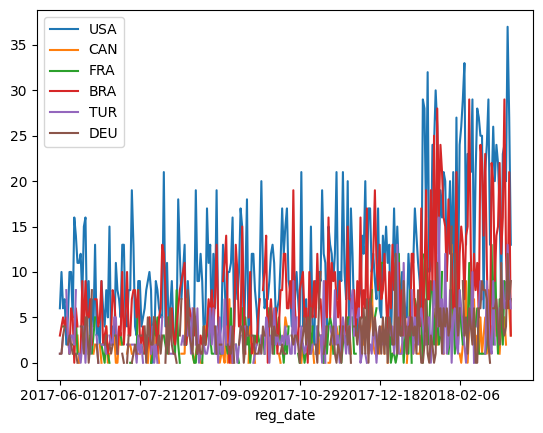

In [273]:
# Plot the average first week purchases for each country by registration date
country_pivot.plot(x='reg_date', y=['USA', 'CAN', 'FRA', 'BRA', 'TUR', 'DEU'])
plt.show()

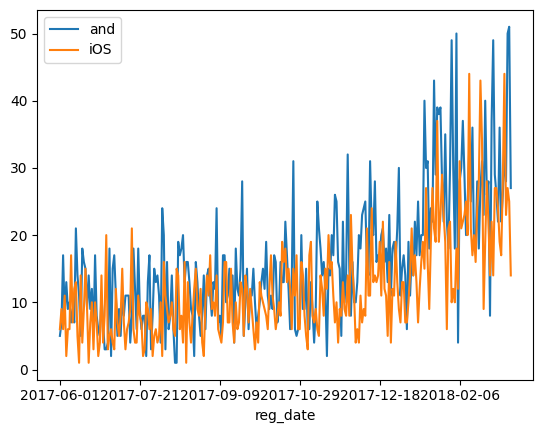

In [274]:
device_pivot.columns = [col[-1] for col in device_pivot.columns.values]
device_pivot =  device_pivot.reset_index()
# Plot the average first week purchases for each device by registration date
device_pivot.plot(x='reg_date', y=['and' , 'iOS'])
plt.show()

In [290]:
# Compute 7_day_rev
daily_revenue = pd.read_csv('./daily_revenue.csv',parse_dates=True,index_col=0)
daily_revenue.dropna(inplace=True,how='any')
daily_revenue.date = pd.to_datetime(daily_revenue.date)
daily_revenue = daily_revenue.groupby(by=['date']).agg({'revenue': ['sum']}).reset_index()
daily_revenue.columns = ['date', 'revenue']
daily_revenue

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_54700\1987559185.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_revenue = pd.read_csv('./daily_revenue.csv',parse_dates=True,index_col=0)


,date,revenue
0,2013-09-20 00:00:00+00:00,1040405.0
1,2013-09-21 00:00:00+00:00,998827.0
2,2013-09-22 00:00:00+00:00,950908.0
3,2013-09-23 00:00:00+00:00,890947.0
4,2013-09-24 00:00:00+00:00,942562.0
...,...,...
1195,2016-12-28 00:00:00+00:00,987851.0
1196,2016-12-29 00:00:00+00:00,1091276.0
1197,2016-12-30 00:00:00+00:00,1031882.0
1198,2016-12-31 00:00:00+00:00,999399.0


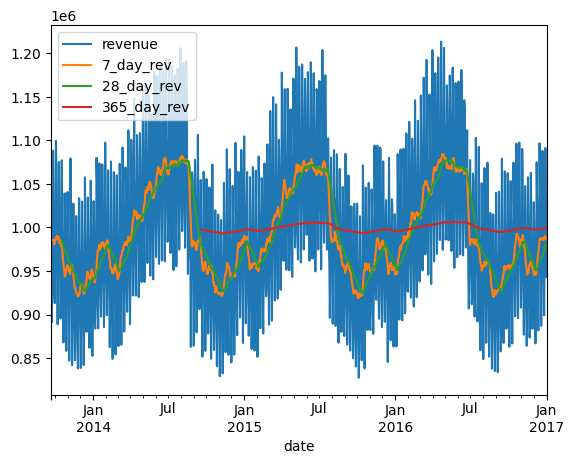

In [291]:

daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7,center=False).mean()
    
# Compute 28_day_rev
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_revenue.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ])
plt.show()

Great work! Notice that while there is a lot of seasonality, our revenue seems to be somewhat flat over this time period.

Using the .ewm() method, calculate the exponential rolling average with a span of 10 and store it in a column small_scale.

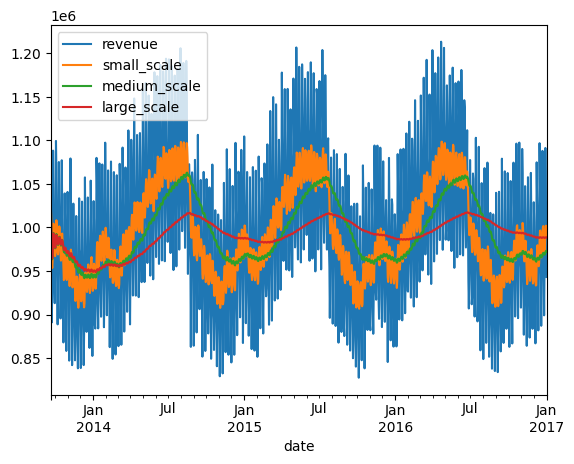

In [292]:
# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()

# Calcualte 'large_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()

# Plot the date, and the raw data plus the calculated averages
daily_revenue.plot(x = 'date', y =['revenue','small_scale', 'medium_scale', 'large_scale'])
plt.show()

Great work! Note that the medium window strikes the right balance. Revenue seems to be growing in this product so it must not be the cause of the overall flat revenue trend!

In [303]:
user_revenue = pd.read_csv('./daily_revenue.csv',parse_dates=True,index_col=0)
user_revenue['month'] = pd.to_datetime(user_revenue['date']).dt.to_period('M').dt.to_timestamp('M')

user_revenue

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_54700\1612349802.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_revenue = pd.read_csv('./daily_revenue.csv',parse_dates=True,index_col=0)
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_54700\1612349802.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  user_revenue['month'] = pd.to_datetime(user_revenue['date']).dt.to_period('M').dt.to_timestamp('M')


,gender,device,revenue,date,country,month
index,,,,,,
1,male,ios,186557.0,2013-09-20T00:00:00Z,USA,2013-09-30
2,male,ios,177217.0,2013-09-21T00:00:00Z,USA,2013-09-30
3,male,ios,177197.0,2013-09-22T00:00:00Z,USA,2013-09-30
4,male,ios,157193.0,2013-09-23T00:00:00Z,USA,2013-09-30
5,male,ios,165592.0,2013-09-24T00:00:00Z,USA,2013-09-30
...,...,...,...,...,...,...
1196,female,android,14003.0,2016-12-28T00:00:00Z,TUR,2016-12-31
1197,female,android,16473.0,2016-12-29T00:00:00Z,TUR,2016-12-31
1198,female,android,14344.0,2016-12-30T00:00:00Z,TUR,2016-12-31


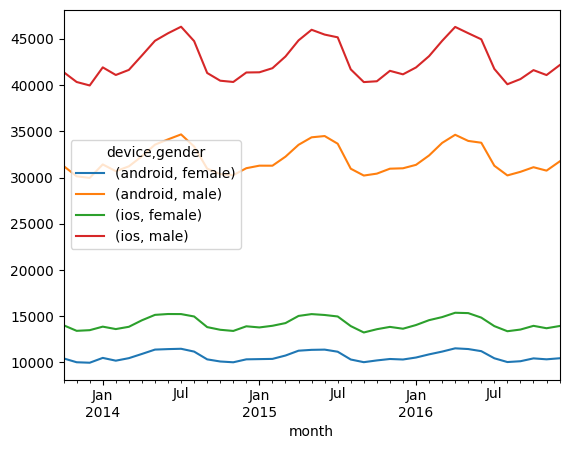

In [304]:
# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values='revenue', columns=['device', 'gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot()
plt.show()